<a href="https://colab.research.google.com/github/mystic23/SCAPI/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO COMPUTACIONAL**

##**SOLUCIONES COMPUTACIONALES A PROBLEMAS EN INGENIERIA**

###• **Profesor:** Lic. Ing. Alfonso M. Mancilla Herrera, M.Sc. Dr.

###• **Estudiantes:** Maria Jose Duque Polo y Maria Isabel Solá Valle

#Problema 01: Newton-Raphson

A partir de un análisis gráfico determine el número de soluciones de los sistemas mostrados a continuación.

##Sistemas de Ecuaciones 01

  $f(x,y)=7x^3-10x-y-1=0$

  $g(x,y)=8y^3-11y+x-1=0$

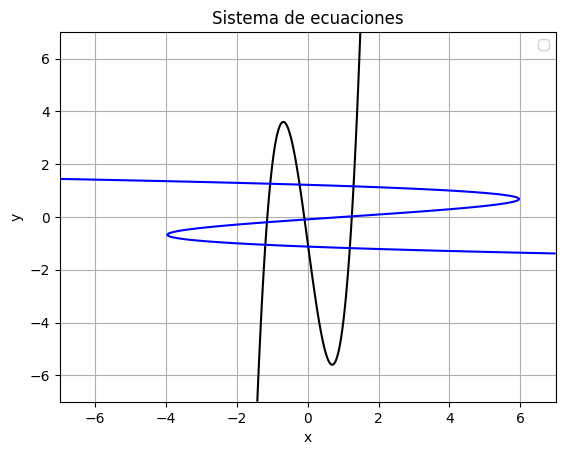

El número de soluciones del sistema de ecuaciones es: 2
Solución 1 : x = -0.09053305397081236 , y = -0.09053305397081236
Solución 2 : x = -0.09986367086952218 , y = -0.09986367086952218


In [29]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def f(x, y):
    return (7*x**3) - (10*x) - (y) - (1)

def g(x, y):
    return (8*y**3) - (11*y) + (x) - (1)

x = np.linspace(-7, 7, 500)
y = np.linspace(-7, 7, 500)
X, Y = np.meshgrid(x, y)
Z1 = f(X, Y)
Z2 = g(X, Y)

plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sistema de ecuaciones')
plt.legend()
plt.grid(True)
plt.show()

def ecuaciones(vars):
    x, y = vars
    return [f(x, y), g(x, y)]

soluciones = fsolve(ecuaciones, (0, 0))
numero_de_soluciones = len(soluciones)
print("El número de soluciones del sistema de ecuaciones es:", numero_de_soluciones)
for i, solucion in enumerate(soluciones):
    print("Solución", i+1, ": x =", solucion, ", y =", solucion)



##Sistemas de Ecuaciones 02

  $f(x,y)=x^2+x\cdot y^3-9$

  $g(x,y)=3x^2\cdot y- y^3-4$


Posteriormente Encuentre las solucións al mediante el algoritmo de Newton-Raphson. Haga una gráfica encerrando en un círculo cada una de las soluciones obtenidas a partir de una punto cualquiera en las vecindades de las soluciones.

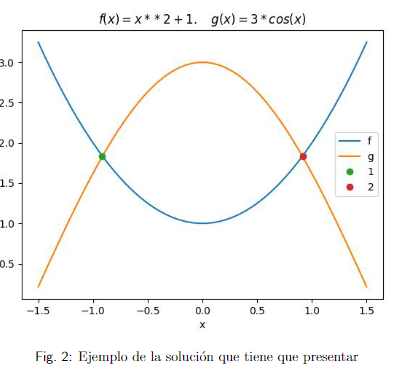

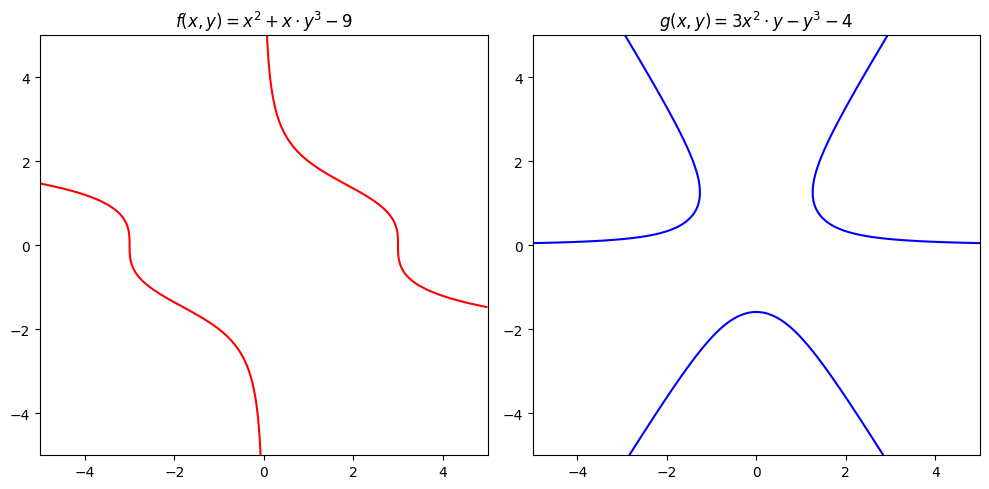

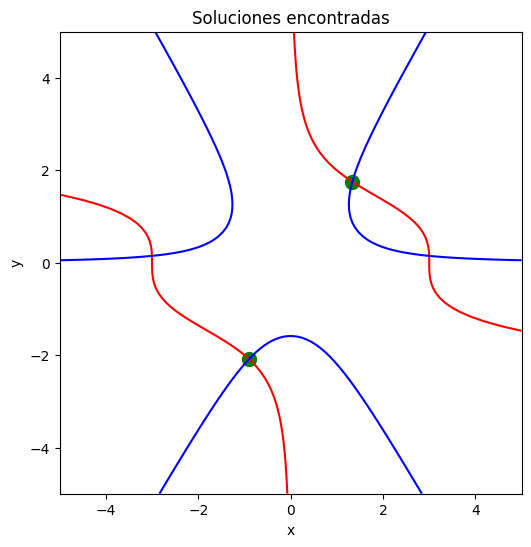


El número de soluciones del sistema de ecuaciones es: 2
Solución 1 : x = 7.712242731443736e-05 , y = 7.712242731443736e-05
Solución 2 : x = -0.00010133814023443048 , y = -0.00010133814023443048


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def f(x, y):
    return x**2 + x * y**3 - 9

def g(x, y):
    return 3 * x**2 * y - y**3 - 4

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)

Z_f = f(X, Y)
Z_g = g(X, Y)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z_f, levels=[0], colors='red')
plt.title('$f(x, y) = x^2 + x \cdot y^3 - 9$')

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z_g, levels=[0], colors='blue')
plt.title('$g(x, y) = 3x^2 \cdot y - y^3 - 4$')

plt.tight_layout()
plt.show()

x0_1 = 2.0
y0_1 = 2.0

x0_2 = -2.0
y0_2 = -2.0

solution_1 = fsolve(ecuaciones, (x0_1, y0_1))
solution_2 = fsolve(ecuaciones, (x0_2, y0_2))

if len(solution_1) == 2 and len(solution_2) == 2:
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, Z_f, levels=[0], colors='red')
    plt.contour(X, Y, Z_g, levels=[0], colors='blue')
    plt.scatter(solution_1[0], solution_1[1], color='green', marker='o', s=100)
    plt.scatter(solution_2[0], solution_2[1], color='green', marker='o', s=100)
    plt.title('Soluciones encontradas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def ecuaciones(vars):
    x, y = vars
    return [f(x, y), g(x, y)]

soluciones = fsolve(ecuaciones, (0, 0))
numero_de_soluciones = len(soluciones)
print("\nEl número de soluciones del sistema de ecuaciones es:", numero_de_soluciones)
for i, solucion in enumerate(soluciones):
    print("Solución", i+1, ": x =", solucion, ", y =", solucion)


#Problema 02: Búsqueda de Raíces
Para cada uno de los métodos de búsqueda de raíces estudiados, usted debe diseñar e implementar tres gráficos que ilustren la acción del algoritmo cuando $k=0$(condiciones iniciales) y en las iteraciones $k=1$ y $k=2$.  
Usted tiene la libertad para escoger la función en cada caso.

<center>
$c_k=\frac{a_k+b_k}{2}$

$c_{k}=b_k-\frac{f(b_k)\cdot (b_k-a_k)}{f(b_k)-f(a_k)}$

$x_{k+1}=x_{k}-\frac{f(x_{k})}{f^{\prime}(x_{k})}$



In [50]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
import scipy.integrate as integrate

#Metodo Regula Falsi

In [145]:
def regula_falsi(f, ak, bk, tol):
    print('\nMétodo de Regula Falsi\n')
    print('k\t ak\t bk\t ck\tEa\n')

    Ea = abs(bk - ak)
    k = 0
    c_ant = 0

    while k <= 2:

        ck = bk - (f(bk) * (bk - ak)) / (f(bk) - f(ak))
        Ea = abs(ck - c_ant)

        print("k = ", k, "\t  ak = ", ak, "\t   bk = ", bk, "\t\t ck = ", ck, "\t Ea = ", Ea)

        x = np.linspace(ak, bk, 1000)
        plt.grid()
        plt.plot(x, f(x), label='f(x)')

        plt.plot([ak, bk], [0, 0])
        plt.plot([ak, ak], [0, f(ak)], label = '(ak,f(ak))')
        plt.plot([bk, bk], [f(bk), 0], label = '(bk,f(bk))')
        plt.plot([ck, ck], [0, f(ck)],  label= '(ck,f(ck))')
        plt.plot([ak, bk], [f(ak), f(bk)], color='orange')

        plt.text(ak,f(ak),'(ak,f(ak))')
        plt.text(bk,f(bk),'(bk,f(bk))')
        plt.text(ck,f(ck),'(ck,f(ck))')
        plt.legend()
        plt.title(r'$f(x) = ((x-0.2)^2)-0.1, k={}$'.format(k))
        plt.suptitle("Método de Regula Falsi")
        plt.show()

        if f(ck) == 0:
            return ck
        else:
            if f(ak) * f(ck) > 0:
                ak = ck
            else:
                bk = ck
        k += 1
        c_ant = ck
    print("El valor de la raíz es = ", ck)
    return ck


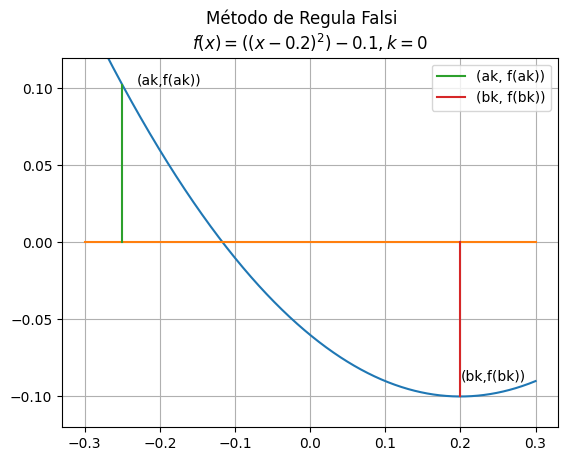

In [228]:
x = sp.symbols("x")
f = ((x-0.2)**2)-0.1
f = sp.lambdify(x, f)
x = np.linspace(-0.3, 0.3, 1000)

plt.plot(x, f(x))
plt.plot([-0.3, 0.3], [0, 0])
plt.text(-0.23,f(-0.25),'(ak,f(ak))')
plt.plot([-0.25, -0.25], [0, f(-0.25)], label='(ak, f(ak))')
plt.text(0.2,f(0.3),'(bk,f(bk))')
plt.plot([0.2, 0.2], [0, f(0.2)], label='(bk, f(bk))')
plt.title("$f(x) = ((x-0.2)^2)-0.1,  k = 0$")
plt.suptitle("Método de Regula Falsi")
plt.ylim(-0.12, 0.12)
plt.grid()
plt.legend()
plt.show()


Método de Regula Falsi

k	 ak	 bk	 ck	Ea

k =  0 	  ak =  -0.25 	   bk =  0.2 		 ck =  -0.022222222222222227 	 Ea =  0.022222222222222227


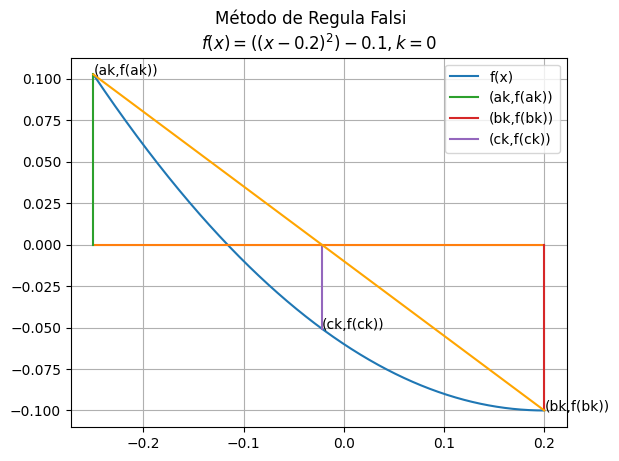

k =  1 	  ak =  -0.25 	   bk =  -0.022222222222222227 		 ck =  -0.09752066115702479 	 Ea =  0.07529843893480256


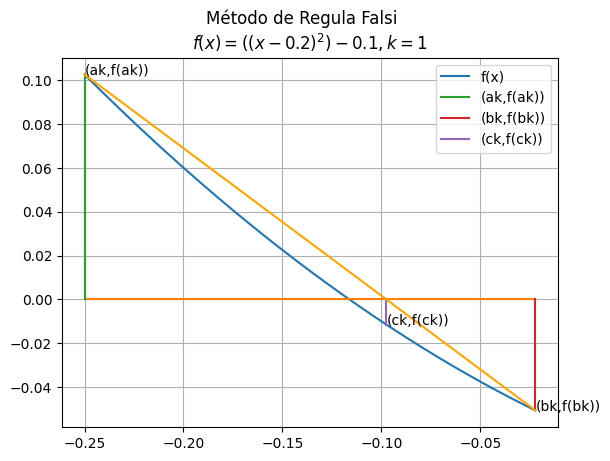

k =  2 	  ak =  -0.25 	   bk =  -0.09752066115702479 		 ck =  -0.1128800442233278 	 Ea =  0.015359383066303009


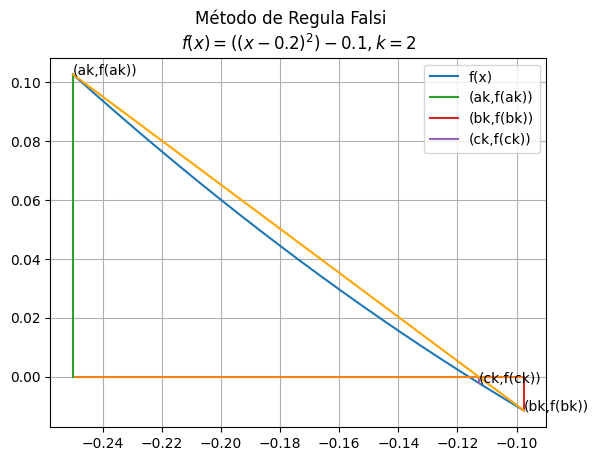

El valor de la raíz es =  -0.1128800442233278


-0.1128800442233278

In [229]:
def f(x):
    return ((x - 0.2) ** 2) - 0.1
regula_falsi(f,-0.25,0.2,10**-3)

#Metodo Bisección

In [217]:
def biseccion(f, ak, bk, tol):
  print('\nMÉTODO DE BISECCIÓN\n')
  print('k\t ak\t bk\t ck\tEa\n')
  Ea=abs(bk-ak)
  k=0
  while Ea>=tol:
    ck=(ak+bk)/2
    print("k = ", k, "\t  ak = ", ak, "\t   bk = ", bk, "\t\t ck = ", ck, "\t Ea = ", Ea)

    x = np.linspace(ak, bk, 1000)
    plt.grid()
    plt.plot(x, f(x), label='f(x)')

    plt.plot([ak, bk], [0, 0])
    plt.plot([ak, ak], [0, f(ak)], label = '(ak,f(ak))')
    plt.plot([bk, bk], [f(bk), 0], label = '(bk,f(bk))')
    plt.plot([ck, ck], [0, f(ck)],  label= '(ck,f(ck))')
    plt.plot([ak, bk], [f(ak), f(bk)], color='orange')

    plt.text(ak,f(ak),'(ak,f(ak))')
    plt.text(bk,f(bk),'(bk,f(bk))')
    plt.text(ck,f(ck),'(ck,f(ck))')
    plt.legend()
    plt.title(r'$f(x) = ((x-0.2)^2)-0.1, k={}$'.format(k))
    plt.suptitle("Método de Biseccion")
    plt.show()

    if f(ck)==0:
      return ck
    else:
      if f(ak)*f(ck)>0:
        ak=ck
      else:
        bk=ck
    Ea=abs(bk-ak)
    k+=1
  print("El valor de la raíz es = ", ck)
  return ck


MÉTODO DE BISECCIÓN

k	 ak	 bk	 ck	Ea

k =  0 	  ak =  -0.25 	   bk =  0.2 		 ck =  -0.024999999999999994 	 Ea =  0.45


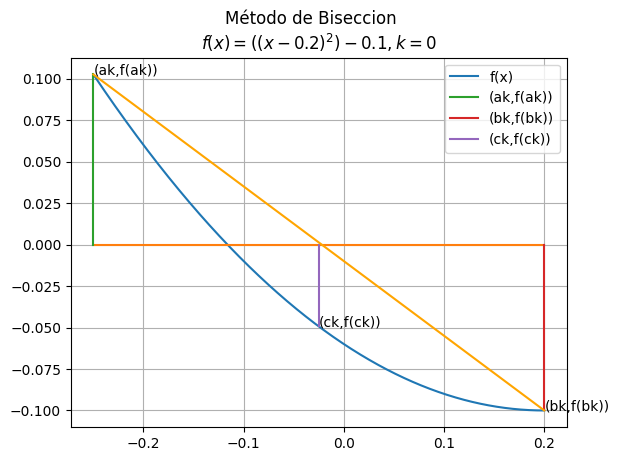

k =  1 	  ak =  -0.25 	   bk =  -0.024999999999999994 		 ck =  -0.1375 	 Ea =  0.225


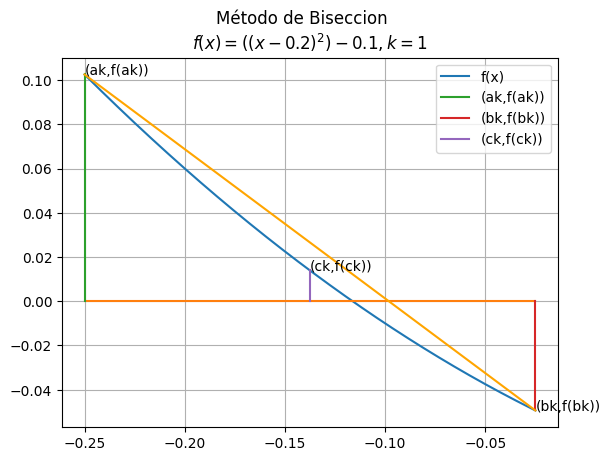

k =  2 	  ak =  -0.1375 	   bk =  -0.024999999999999994 		 ck =  -0.08125 	 Ea =  0.11250000000000002


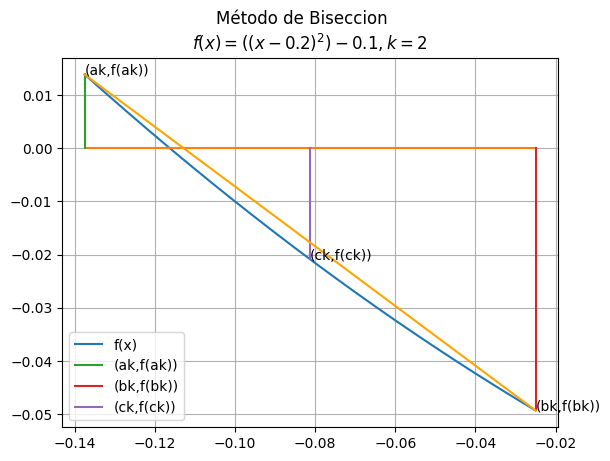

k =  3 	  ak =  -0.1375 	   bk =  -0.08125 		 ck =  -0.109375 	 Ea =  0.05625000000000001


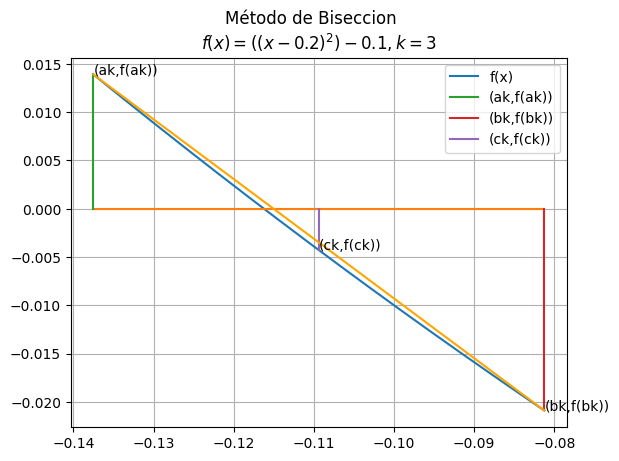

k =  4 	  ak =  -0.1375 	   bk =  -0.109375 		 ck =  -0.1234375 	 Ea =  0.02812500000000001


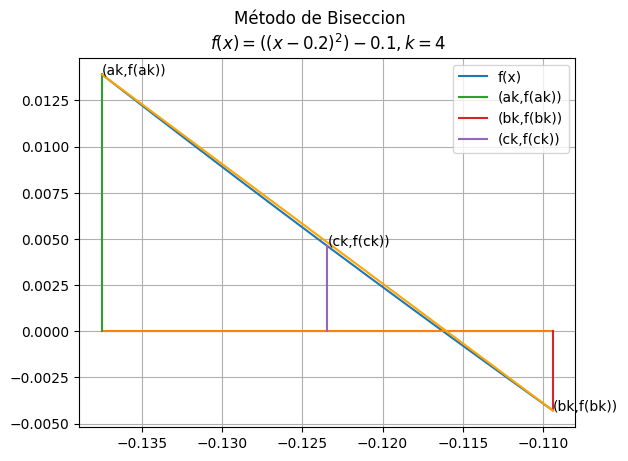

k =  5 	  ak =  -0.1234375 	   bk =  -0.109375 		 ck =  -0.11640625 	 Ea =  0.014062500000000006


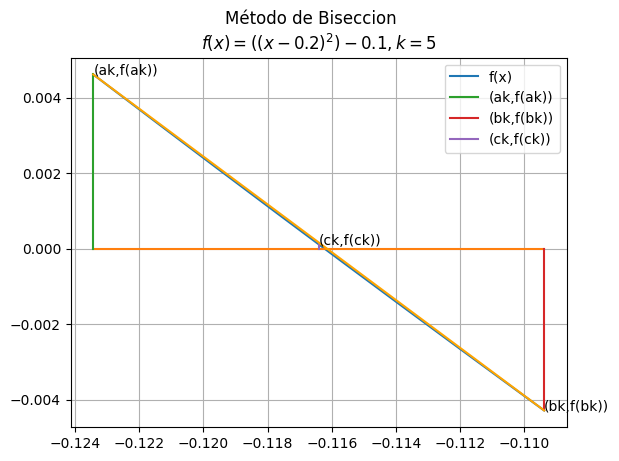

k =  6 	  ak =  -0.11640625 	   bk =  -0.109375 		 ck =  -0.112890625 	 Ea =  0.007031250000000003


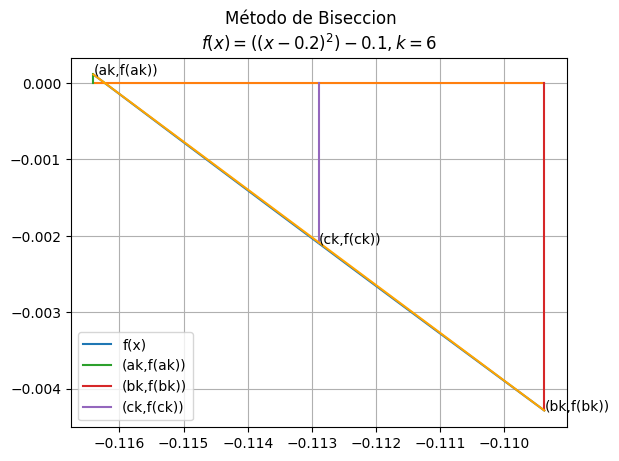

k =  7 	  ak =  -0.11640625 	   bk =  -0.112890625 		 ck =  -0.1146484375 	 Ea =  0.0035156250000000083


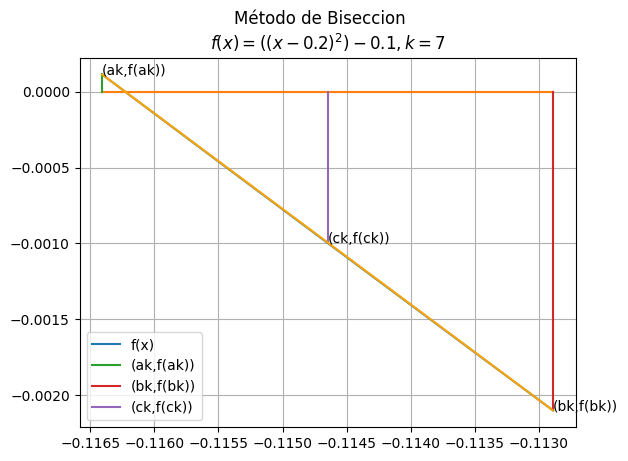

k =  8 	  ak =  -0.11640625 	   bk =  -0.1146484375 		 ck =  -0.11552734375000001 	 Ea =  0.0017578124999999972


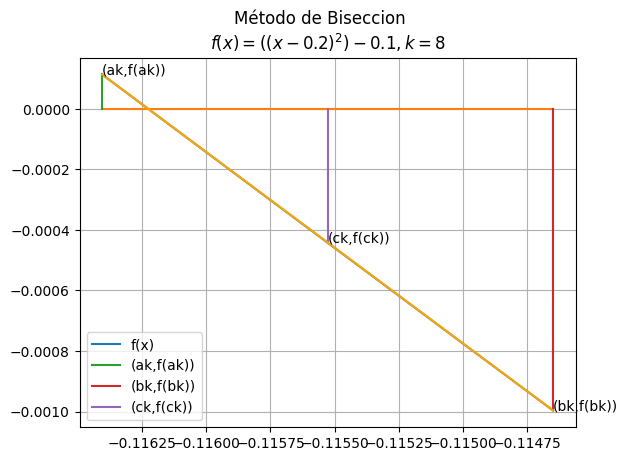

El valor de la raíz es =  -0.11552734375000001


-0.11552734375000001

In [218]:
def f(x):
    return ((x - 0.2) ** 2) - 0.1
biseccion(f,-0.25,0.2,10**-3)

#Metodo Secante

In [147]:
def Secante(f, xk, xk__1, tol, maxiter):
    print('\nMÉTODO DE LA SECANTE\n')

    for k in range(maxiter):
        xk_1 = xk - ((f(xk) * (xk - xk__1)) / (f(xk) - f(xk__1)))
        Ea = abs(xk_1 - xk)
        print("k= ", k, "\t\t xk=", xk, "\t\tEa= ", Ea)

        x = np.linspace(xk__1, xk, 1000)
        plt.grid()
        plt.plot(x, f(x), label='f(x)')

        plt.plot([xk__1, xk], [0, 0])
        plt.plot([xk__1, xk__1], [0, f(xk__1)], label='(xk__1, f(xk__1))')
        plt.plot([xk, xk], [f(xk), 0], label='(xk, f(xk))')
        plt.plot([xk_1, xk_1], [0, f(xk_1)], label='(xk_1, f(xk_1))')
        plt.plot([xk__1, xk], [f(xk__1), f(xk)], color='orange')

        plt.text(xk__1, f(xk__1), '(xk__1, f(xk__1))')
        plt.text(xk, f(xk), '(xk, f(xk))')
        plt.text(xk_1, f(xk_1), '(xk_1, f(xk_1))')
        plt.legend()
        plt.title(r'$f(x) = ((x-0.2)^2)-0.1, k={}$'.format(k))
        plt.suptitle("Método de la Secante")
        plt.show()

        if Ea < tol:
            print("El valor de la raíz es =", xk_1)
            return xk_1

        xk__1 = xk
        xk = xk_1

    return [None]



MÉTODO DE LA SECANTE

k=  0 		 xk= -0.25 		Ea=  0.2277777777777778


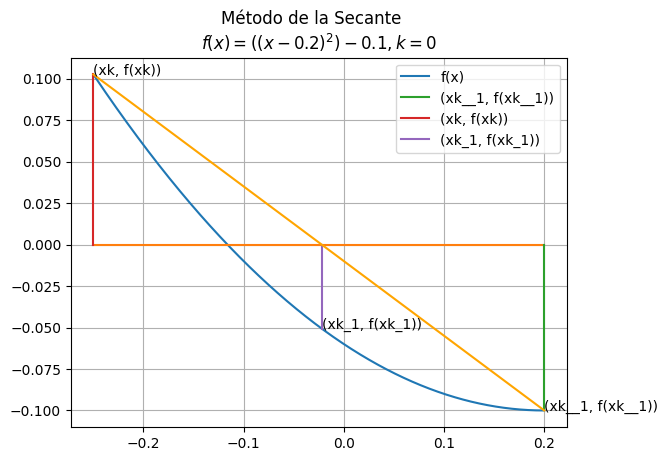

k=  1 		 xk= -0.0222222222222222 		Ea=  0.07529843893480258


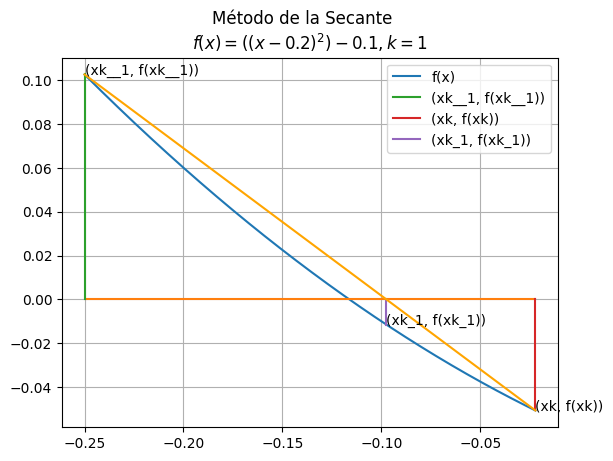

k=  2 		 xk= -0.09752066115702478 		Ea=  0.022090646263469904


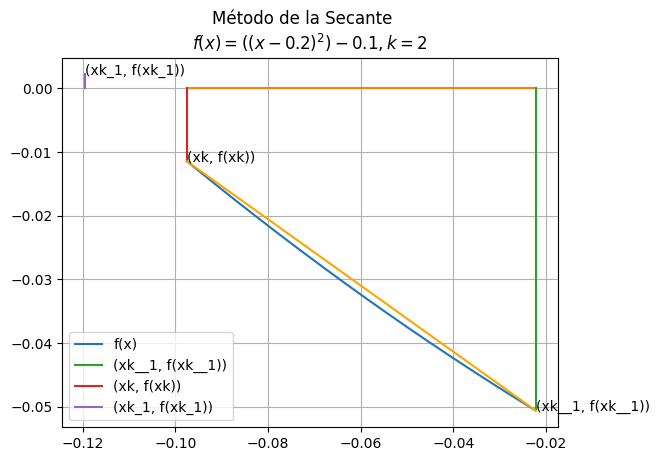

k=  3 		 xk= -0.11961130742049468 		Ea=  0.0034861066037413097


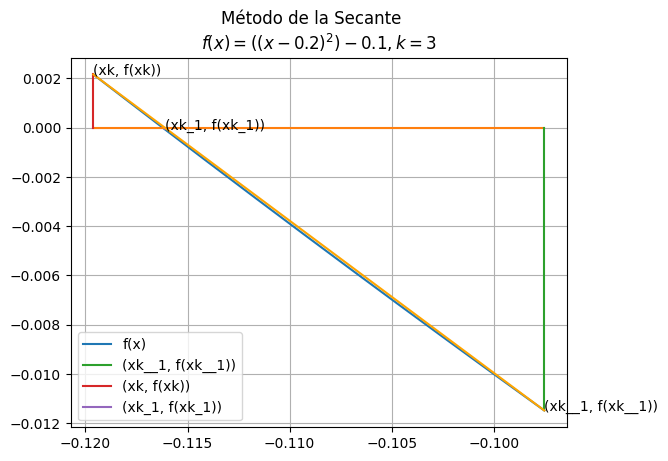

k=  4 		 xk= -0.11612520081675337 		Ea=  0.00010201932361440791


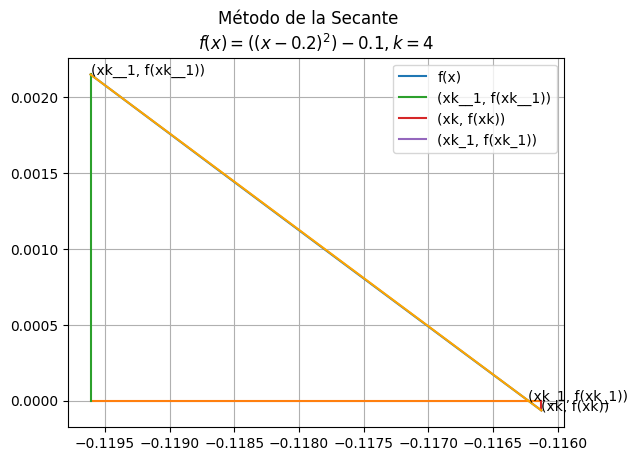

El valor de la raíz es = -0.11622722014036778


-0.11622722014036778

In [148]:
def f(x):
    return ((x - 0.2) ** 2) - 0.1
Secante(f, -0.25, 0.2, 1e-3, 5)


#Método de newton

In [149]:
def newton(f, df, xk, tol, maxiter):
    print('\nMÉTODO DE NEWTON\n')

    for k in range(maxiter):
        xk1 = xk - f(xk) / df(xk)
        Ea = abs(xk1 - xk)
        print("k= ", k, "\t\t xk=", xk, "\t\tEa= ", Ea)

        x = np.linspace(xk - 1, xk + 1, 1000)
        plt.grid()
        plt.plot(x, f(x), label='f(x)')
        plt.axhline(y=0, color = "orange")
        plt.axvline(x=xk,color='green', label='xk')
        plt.axvline(x=xk1,color = "red", label='xk1')
        plt.legend()
        plt.title(r'$f(x) = ((x-0.2)^2)-0.1, k={}$'.format(k))
        plt.suptitle("Método de Newton")
        plt.show()

        if Ea < tol:
            print("El valor de la raíz es =", xk1)
            return xk1

        xk = xk1

    return [None]


MÉTODO DE NEWTON

k=  0 		 xk= -2 		Ea=  1.0772727272727274


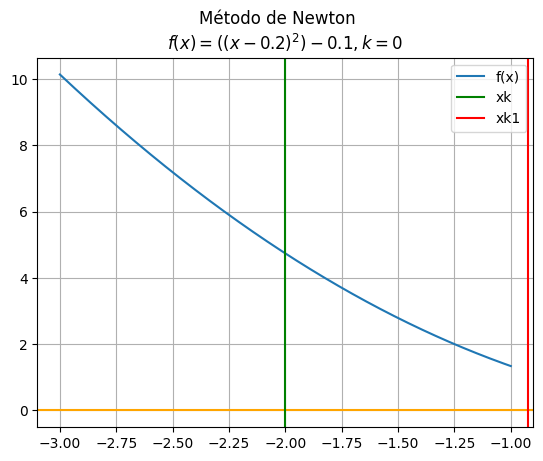

k=  1 		 xk= -0.9227272727272726 		Ea=  0.5168292234081706


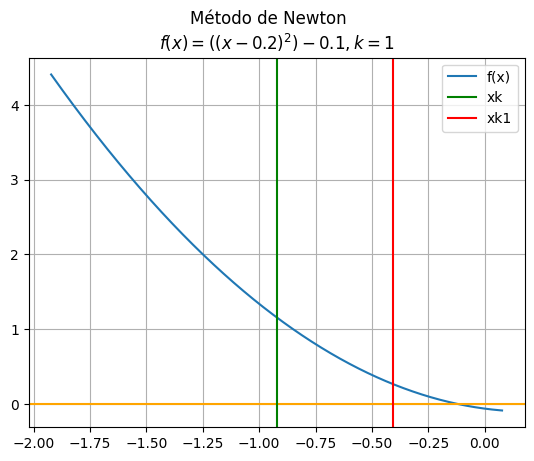

k=  2 		 xk= -0.405898049319102 		Ea=  0.2204268906863699


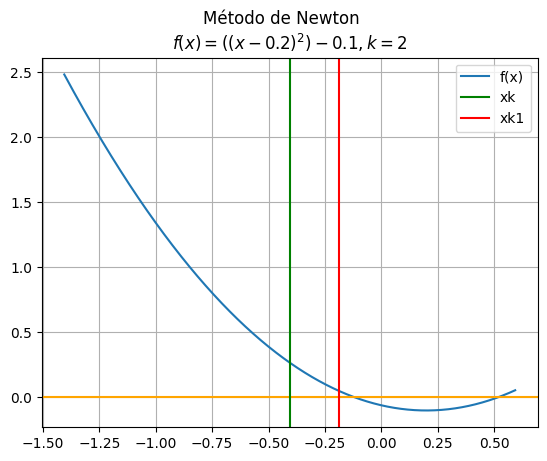

k=  3 		 xk= -0.1854711586327321 		Ea=  0.06302418877459318


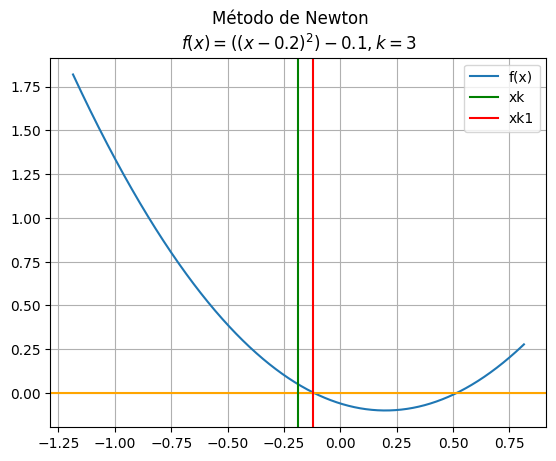

k=  4 		 xk= -0.12244696985813894 		Ea=  0.006159227317972721


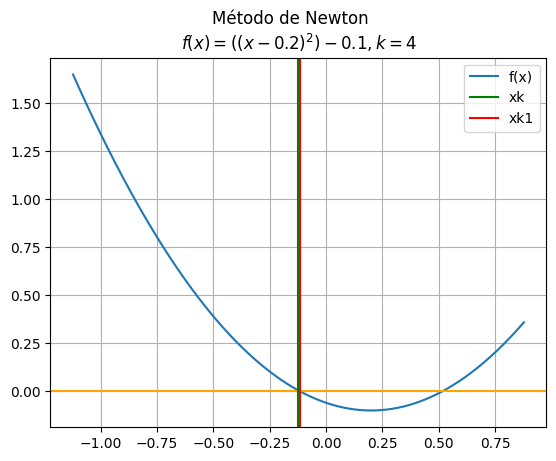

k=  5 		 xk= -0.11628774254016622 		Ea=  5.997083676054227e-05


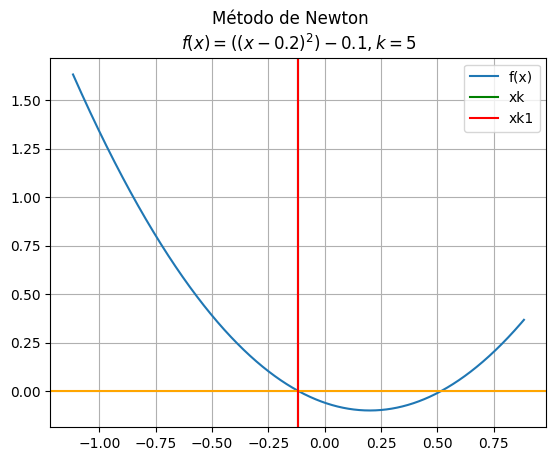

El valor de la raíz es = -0.11622777170340567


-0.11622777170340567

In [150]:
x= sp.symbols('x')
f = ((x - 0.2) ** 2) - 0.1
df = sp.diff(f, x)
f= sp.lambdify(x, f)
df= sp.lambdify(x, df)
newton(f, df, -2, 10**-3, maxiter=100)



#Problema 03:  Algebra de matrices

#1. Sistemas de ecuaciones Lineales

Se factorizó la matriz de los coeficientes de un sistema de ecuaciones lineales, mediante el algoritmo de Cholesky y se obtuvo que:
$\mathbf{L}=\left(\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 0 & 0\\
1 & 2 & 1 & 0 & 0\\
1 & 4 &6 & 4 & 1
\end{array}\right)$

#1.1 Ecuaciones en forma matricial
Genere valores aleatorios enteros para la matriz $b$ y escriba aquí el sistema de ecuaciones correspondientes, esto es, las matrices $A, b$ y $x$. Puedes tomar cualquiera de los que yo he elaborado y cambiar los coeficientes de las incógnitas.(20\%)

In [273]:
import numpy as np
import sympy as sp

In [279]:
L = np.array([[1, 0, 0, 0, 0],
              [1, 1, 0, 0, 0],
              [1, 2, 1, 0, 0],
              [1, 4, 6, 4, 1]])

b = np.random.randint(-5, 10, size=(4, 1)) #Aquí genero los valores aleatorios

A_0 = np.dot(L, L.T)  #Aquí obtengo lo que es A aplicando la formula donde A = L * L^T
x = np.linalg.solve(A_0, b)

print("Matriz A: \n", A_0)
print("Matriz b: \n", b)
print("Matriz x: \n", x)


Matriz A: 
 [[ 1  1  1  1]
 [ 1  2  3  5]
 [ 1  3  6 15]
 [ 1  5 15 70]]
Matriz b: 
 [[3]
 [8]
 [0]
 [6]]
Matriz x: 
 [[-25.76470588]
 [ 59.70588235]
 [-34.52941176]
 [  3.58823529]]


In [280]:
b = np.array([3, 8, 0, 6])

#Punto 1.1

In [290]:

A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
b = np.array([3, 8, 0, 6])

x1,x2,x3,x4 = sp.symbols('x1,x2,x3,x4')

x=sp.Matrix([x1,x2,x3,x4])
b=sp.Matrix([3, 8, 0, 6])
A = sp.Matrix([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
print(A@x+b,'\n\n')

Matrix([[x1 + x2 + x3 + x4 + 3], [x1 + 2*x2 + 3*x3 + 5*x4 + 8], [x1 + 3*x2 + 6*x3 + 15*x4], [x1 + 5*x2 + 15*x3 + 70*x4 + 6]]) 




#Punto 1.2 Método Clásico

Resuelva el sistema utilizando el algoritmo de la inversa. (10\%).

In [284]:
A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
b = np.array([3, 8, 0, 6])

x = np.linalg.inv(A)@b
print('Los valores de x son: ', x)

Los valores de x son:  [-25.76470588  59.70588235 -34.52941176   3.58823529]


#Punto 1.3  Método de Gauss Jordan

 Resuelva el sistema utilizando el algoritmo el algoritmo de Gauss-Jordan. Imprime aquí los valores de la matríz aumentada, al comienzo $[A b]$, y al final $[I x]$ (10\%)



In [295]:

A = np.matrix([[ 1, 1,  1,  1, 3],
               [ 1,  2,  3,  5 , 8],
               [ 1 , 3,  6, 15, 0],
               [ 1 , 5, 15 ,70 ,6]])
print("Matriz Aumentada \n", A)

Aumentada = sp.Matrix(A).rref()
print('Método de Gauss-Jordan [I x] \n', Aumentada)

Matriz Aumentada 
 [[ 1  1  1  1  3]
 [ 1  2  3  5  8]
 [ 1  3  6 15  0]
 [ 1  5 15 70  6]]
Método de Gauss-Jordan [I x] 
 (Matrix([
[1, 0, 0, 0, -438/17],
[0, 1, 0, 0, 1015/17],
[0, 0, 1, 0, -587/17],
[0, 0, 0, 1,   61/17]]), (0, 1, 2, 3))


#Punto 1.4 Factorización de Matrices

Factorice la matríz A del numeral 1.1. utilizando factorización de Doolittle
Imprime aquí los valores de $P, L, U$ (10\%),y los sistemas triangulares a resolver, esto es,$U\cdot x=y$ y $L\cdot y= b$ (10\%).
Por último, resuelva el sistema mediante los algoritmos de sustituciones progresivas(20\%) y Regresivas(20\%).
Por favor, al imprimir los resultados especifique claramente a que algoritmo corresponde los resultados impresos, acorde con la rúbrica de evaluación.

In [303]:
# Código desarrollado por: profesor Alfonso Mancilla
def Sustituciones_Progresivas(L,b):
  n=len(b)
  x=np.zeros(b.shape)
  if L[0,0]==0:
    return None
  else:
    x[0]=b[0]/L[0,0]
    for i in range(1,n):
      if L[i,i]==0:
        break
      else:
        x[i]=(b[i]-np.dot(L[i,0:i],x[0:i]))/L[i,i]
    return x

def Sustituciones_Regresivas(U,b):
  n=len(b)
  x=np.zeros(b.shape)
  if U[0,0]==0:
    return None
  else:
    x[n-1]=b[n-1]/U[n-1,n-1]
    print(x[n-1])
    for i in range(n-2,-1,-1):
      if U[i,i]==0:
        break
      else:
        x[i]=(b[i]-np.dot(U[i,i+1:n],x[i+1:n]))/U[i,i]
    return x

In [305]:
import numpy as np, sympy as sp,matplotlib.pyplot as plt, scipy as sc

A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
b = np.array([3, 8, 0, 6])
# print(np.eye(4,4), '\n') #explicacion de los intercambios
P, L, U = sc.linalg.lu(A)  #DOLITTLE-CROUNT
print('Matriz de permutación P: \n', P, '\n\n Matriz triangular inferior L (Dolittle): \n',L,  '\n\n Matriz triangular superior U: \n', U , '\n')


y= np.linalg.inv(L)@P@b.T

x_fm= np.linalg.inv(U)@y.T  #factorizacion de matrices
x_mc=np.linalg.inv(A)@b.T   #metodo clasico

y=Sustituciones_Progresivas(L,P@b)
print('\nFactorización de Matrices, Sustituciones Progresivas. L.y=P.b \ny=',y)
x=Sustituciones_Regresivas(U,y)
print('\nFactorización de Matrices, Sustituciones Regresivas. U.x=y \nx=',x)


Matriz de permutación P: 
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]] 

 Matriz triangular inferior L (Dolittle): 
 [[1.   0.   0.   0.  ]
 [1.   1.   0.   0.  ]
 [1.   0.5  1.   0.  ]
 [1.   0.25 0.75 1.  ]] 

 Matriz triangular superior U: 
 [[  1.      1.      1.      1.   ]
 [  0.      4.     14.     69.   ]
 [  0.      0.     -2.    -20.5  ]
 [  0.      0.      0.      2.125]] 


Factorización de Matrices, Sustituciones Progresivas. L.y=P.b 
y= [ 3.     3.    -4.5    7.625]
3.588235294117647

Factorización de Matrices, Sustituciones Regresivas. U.x=y 
x= [-25.76470588  59.70588235 -34.52941176   3.58823529]


#Punto 1.5 Métodos Iterativos - Gauss Seidel
Resuelva el sistema utilizando el algoritmo de Gauss-Seidel(20\%)

In [51]:

A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
DP = np.diag(abs(A),0)
NDP = np.sum(abs(A),axis=1).T-DP

print('A = \n', A ,'\n\n','DP = \n', DP,'\n\n','NDP = \n', NDP ,'\n')


def cgjygs(A):
  DP = np.diag(np.abs(A),0)
  NDP = np.sum(np.abs(A),axis=1).T-DP
  if np.all(DP > NDP, axis=0):
    print("La matriz es estrictamente dominante en sentido diagonal")
    return True
  else:
     print("La matriz  No es estrictamente dominante en sentido diagonal")
     return False

print(cgjygs(A))

A = 
 [[ 1  1  1  1]
 [ 1  2  3  5]
 [ 1  3  6 15]
 [ 1  5 15 70]] 

 DP = 
 [ 1  2  6 70] 

 NDP = 
 [ 3  9 19 21] 

La matriz  No es estrictamente dominante en sentido diagonal
False


#Problema 4 Interpolación Funcional

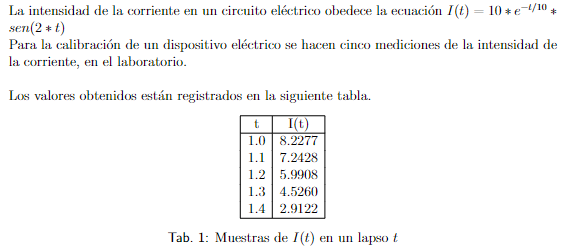

In [306]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [307]:
#Valores obtenidos de I en un lapso t
t = np.array([1.0, 1.1, 1.2, 1.3, 1.4])
I = np.array([8.2277, 7.2428, 5.9908, 4.5260, 2.9122])

#2.1 El polinomio de interpolación

Coloque aquí, en un sólo lienzo, la gráfica del Polinomio de Interpolación(con guiones azules), Los puntos de la tabla (con círculos negros) y la función $I(t)$ (con puntos magenta). Etiquete los ejes y coloque la leyenda correspondiente.(30\%).

       4         3         2
3.958 x - 9.158 x - 11.91 x + 27.1 x - 1.767


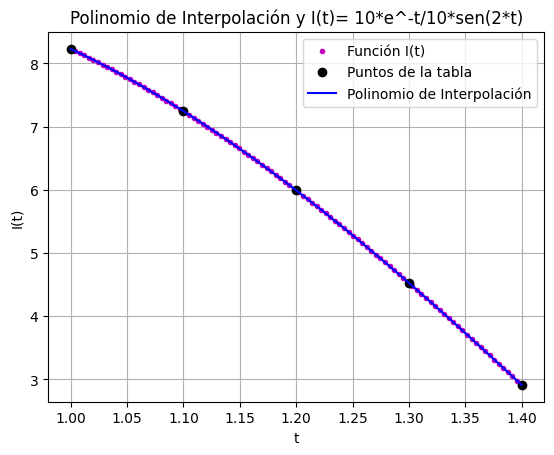

In [308]:
#sabemos que t es x y I(t) es y
def f(t):
    return 10 * np.exp(-t / 10) * np.sin(2 * t)

x = np.linspace(1, 1.4, 100)
y = np.array([f(t) for t in x])

PL = lagrange(t, I) # Lagrange
print(PL)

t_interpolation = np.linspace(1, 1.4, 100)
I_interpolation = PL(t_interpolation)

plt.plot(x, y, 'm.', label='Función I(t)')
plt.plot(t, I, 'ko', label='Puntos de la tabla')
plt.plot(t_interpolation, I_interpolation, 'b-', label='Polinomio de Interpolación')

#aqui nombro los ejes
plt.xlabel('t')
plt.ylabel('I(t)')

plt.legend()
plt.title('Polinomio de Interpolación y I(t)= 10*e^-t/10*sen(2*t)')
plt.grid(True)
plt.show()


#2.2 El polinomio de Lagrange

Determine dos de los PCL, polinomios cocientes de Lagrange. Graficarlos en un lienzo. En el título especifique cuales son, etiquete los ejes y coloque la leyenda correspondiente. (30\%).

$$P_n(x)=\sum_{k=0}^{n}y_k\cdot L_{n,k}(x),\\ \texttt{donde}\\ L_{n.k}(x)=\frac{\prod_{j=0,\,j\ne k}^{n}(x-x_j)}{\prod_{j=0,\,j\ne k}^{n}(x_k-x_j)} \texttt{ son los Polinomios coeficientes de Lagrange}\\ \texttt{Ejemplo. Polinomio de Lagrange de grado 2.}\\ P_2(x)=\sum_{k=0}^{n}y_k\cdot L_{n,k}(x)=y_0\cdot L_{2,0}(x)+y_1\cdot L_{2,1}(x)+y_2\cdot L_{2,2}(x)$$


lo que esta en la funcion coeficents lo saque con ayuda de chatgpt y utilizando la productoria dada en el overleaf
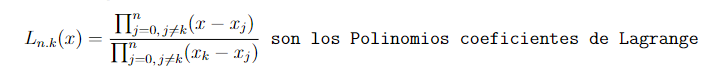

In [309]:
import numpy as np
import matplotlib.pyplot as plt

In [310]:
def f(t):
    return 10 * np.exp(-t / 10) * np.sin(2 * t)

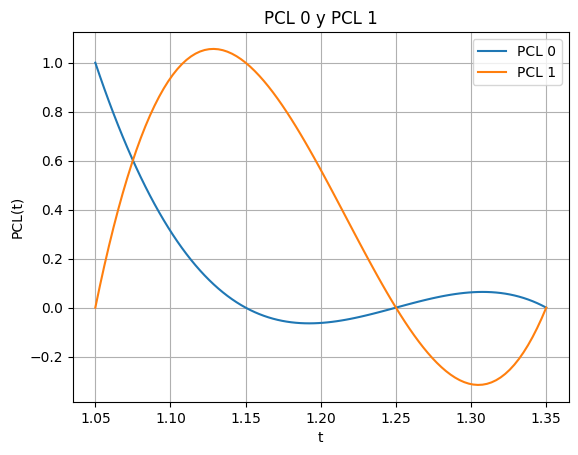

In [311]:
t = np.array([1.05, 1.15, 1.25, 1.35])
I_t = f(t)

# Polinomios Cocientes de Lagrange
def coeficents(t, k):
    n = len(t) - 1
    coef = 1
    for j in range(n + 1):
        if j != k:
            coef *= np.poly1d([1, -t[j]]) / (t[k] - t[j])
    return coef

x = np.linspace(min(t), max(t), 100)
pcl_0 = np.polyval(coeficents(t, 0), x)
pcl_1 = np.polyval(coeficents(t, 1), x)

plt.figure()
plt.plot(x, pcl_0, label='PCL 0')
plt.plot(x, pcl_1, label='PCL 1')

plt.xlabel('t')
plt.ylabel('PCL(t)')
plt.title('PCL 0 y PCL 1')
plt.legend()
plt.grid(True)
plt.show()



#2.3 Error en la interpolación

Utilice Interpolación para estimar los valores de la intensidad de corriente en $t=[1.05, 1.15, 1.25, 1.35,]$.

Imprima aquí una tabla con los Errores Absolutos y relativos correspondientes a la interpolación.


Para este punto se utilizo de guia este algoritmo

    def f(x):
      return x+2/x
    #Dados $ n+1 $ puntos x,y
    #x = input('... ')
    #y = input('... ')

    x=np.array([1, 2, 2.5])  #[1, 2, 2.5]
    y=np.array([f(t) for t in x])

    ejex=np.linspace(min(x),max(x))
    coef_P=np.linalg.inv(np.vander(x))@y #Coeficientes del Polinomio de Interpolación
    print(coef_P)
    P=np.polyval(coef_P,ejex) # Pn(ejex)
    plt.plot(x,y,'o',ejex,P)
    Ea=abs(f(1.5)-np.polyval(coef_P,1.5))
    print("Error aproximado: ", Ea)

Sin embargo, en el desarrollo del for, se hizo uso de chatgpt

In [312]:
import numpy as np

def f(t):
    return 10 * np.exp(-t / 10) * np.sin(2 * t)

t = np.array([1.05, 1.15, 1.25, 1.35])
I = f(t)


x = np.array([1, 1.1, 1.2, 1.3, 1.4])
y = f(x)


table = "   t   |   I(t)  |  P_n(t)  |  E_a(t)  |  E_r(t)  \n"
table += "-------+---------+----------+----------+----------\n"
for i in range(len(t)):
    coef_P = np.polyfit(x, y, i+1)
    P_t = np.polyval(coef_P, t)
    Ea = np.abs(I - P_t)
    Er = Ea / np.abs(I)
    table += f" {t[i]:.2f}  | {I[i]:.4f} | {P_t[i]:.4f}  | {Ea[i]:.4f}  | {Er[i]:.4f}  \n"

print(table)



   t   |   I(t)  |  P_n(t)  |  E_a(t)  |  E_r(t)  
-------+---------+----------+----------+----------
 1.05  | 7.7717 | 7.7821  | 0.0104  | 0.0013  
 1.15  | 6.6470 | 6.6313  | 0.0157  | 0.0024  
 1.25  | 5.2815 | 5.2812  | 0.0003  | 0.0001  
 1.35  | 3.7341 | 3.7340  | 0.0001  | 0.0000  



#Problema 05

Utilizando las técnicas de integración numérica estudiadas, los algoritmos, script y funciones desarrollados en clases, genere las tablas estadísticas correspondientes a las siguientes distribuciones de probabilidad:

  t de Student
  
  Chi cuadrado


Escoger sólo una entre: distribución acumulada, de cola derecha o central.

## t student

In [1]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
import scipy.stats as stats
def fdp_t_estandar(t, df):
    return stats.t.pdf(t, df)
df = 10
f = lambda x: fdp_t_estandar(x, df)
I = stats.t.cdf(0.72, df) - stats.t.cdf(0, df)
col0 = np.arange(0, 4.1, 0.1)
fil0 = np.arange(0, 0.1, 0.01)
nc = fil0.size
nf = col0.size
N = np.zeros((nf+1, nc+1))
N[0, 1:] = fil0
N[1:, 0] = col0
for i in range(1, nf+1):
    for j in range(1, nc+1):
        t = N[i, 0] + N[0, j]
        N[i, j] = stats.t.cdf(t, df)
N

array([[0.        , 0.        , 0.01      , 0.02      , 0.03      ,
        0.04      , 0.05      , 0.06      , 0.07      , 0.08      ,
        0.09      ],
       [0.        , 0.5       , 0.50389101, 0.5077816 , 0.51167133,
        0.51555977, 0.51944651, 0.52333111, 0.52721314, 0.53109219,
        0.53496783],
       [0.1       , 0.53883964, 0.5427072 , 0.54657008, 0.55042788,
        0.55428017, 0.55812655, 0.5619666 , 0.56579991, 0.56962609,
        0.57344472],
       [0.2       , 0.5772554 , 0.58105775, 0.58485136, 0.58863585,
        0.59241082, 0.5961759 , 0.5999307 , 0.60367485, 0.60740798,
        0.61112971],
       [0.3       , 0.6148397 , 0.61853756, 0.62222296, 0.62589555,
        0.62955496, 0.63320088, 0.63683295, 0.64045085, 0.64405425,
        0.64764284],
       [0.4       , 0.6512163 , 0.65477431, 0.65831658, 0.6618428 ,
        0.66535268, 0.66884594, 0.67232229, 0.67578146, 0.67922318,
        0.68264717],
       [0.5       , 0.6860532 , 0.68944099, 0.69281032, 0.

#Chi cuadrado

In [3]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
import scipy.stats as stats
def fdp_chi_cuadrado(x, df):
    return stats.chi2.pdf(x, df)
df = 10
f = lambda x: fdp_chi_cuadrado(x, df)
I = stats.chi2.cdf(0.72, df) - stats.chi2.cdf(0, df)
col0 = np.arange(0, 4.1, 0.1)
fil0 = np.arange(0, 0.1, 0.01)
nc = fil0.size
nf = col0.size
N = np.zeros((nf+1, nc+1))
N[0, 1:] = fil0
N[1:, 0] = col0
for i in range(1, nf+1):
    for j in range(1, nc+1):
        x = N[i, 0] + N[0, j]
        N[i, j] = stats.chi2.cdf(x, df)
N

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e-02, 2.00000000e-02,
        3.00000000e-02, 4.00000000e-02, 5.00000000e-02, 6.00000000e-02,
        7.00000000e-02, 8.00000000e-02, 9.00000000e-02],
       [0.00000000e+00, 0.00000000e+00, 2.59333919e-14, 8.26418564e-13,
        6.24952973e-12, 2.62260096e-11, 7.97028208e-11, 1.97502024e-10,
        4.25106105e-10, 8.25370869e-10, 1.48116700e-09],
       [1.00000000e-01, 2.49795134e-09, 4.00626904e-09, 6.16418755e-09,
        9.15966356e-09, 1.32128439e-08, 1.85783013e-08, 2.55472066e-08,
        3.44494373e-08, 4.56556246e-08, 5.95791391e-08],
       [2.00000000e-01, 7.66780169e-08, 9.74568256e-08, 1.22468474e-07,
        1.52315960e-07, 1.87654072e-07, 2.29191021e-07, 2.77690030e-07,
        3.33970865e-07, 3.98911309e-07, 4.73448598e-07],
       [3.00000000e-01, 5.58580785e-07, 6.55368075e-07, 7.64934096e-07,
        8.88467127e-07, 1.02722128e-06, 1.18251763e-06, 1.35574530e-06,
        1.54836251e-06, 1.76189756e-06, 1.99794981e-

#Problema 06: Implementar el método de interpolación de Newton en Python

##El método de interpolación de newton viene siendo el mismo metodo de divisiones dividas de newton porque son términos intercambiables y se refieren al mismo procedimiento para realizar la interpolación polinómica, ya que ambos calculan los coeficientes del polinomio.

In [77]:
# Profesor Alfonso Mancilla
# Diferencias Divididas de Newton
import numpy as np, sympy as sp, matplotlib.pyplot as plt
def f(x):
  return x+(2/x)

X=np.array([1,2,2.5])
Y=np.array([3,3,3.3])#Y=np.array([f(l) for l in X])
n=len(X)-1; #Grado del Polinomio
D=np.zeros((n+1,n+2));#Matriz para el cálculo de las DD0
D[:,0]=X; D[:,1]=Y;# Primera columna para X y segunda para Y
for j in range(2,n+2):
  for i in range(j-1,n+1):
    D[i,j]=(D[i,j-1]-D[i-1,j-1])/(X[i]-X[i-(j-1)])

DD=np.diag(D,1);#Las DD quedan en la diagonal principal número 1.
print(D,'\n\nDiferencias Divididas:\n', DD)


[[1.  3.  0.  0. ]
 [2.  3.  0.  0. ]
 [2.5 3.3 0.6 0.4]] 

Diferencias Divididas:
 [3.  0.  0.4]


#Problema 07:  Derivación numérica



#Modelo 1

## Linealización del Modelo 1.1

$f(t) = a \cdot e^{-b \cdot (e^{-c \cdot t})}$

Dado uno de los tres parámetros, proceda con la linealización del modelo 1.1 y escoja el parámetro que facilite más la transformación de $y = f(t, a, b, c)$ en la forma $F(x o y) = f(β0 o β1) · G(x o y) + g(β0, β1).$

Si escogió 'a' como constante, grafique en un solo lienzo $f(t, e/2, b, c), f(t, 1, b, c), f(t, -1/2, b, c).$

Si escogió 'b' como constante, grafique en un solo lienzo $f(t, a, -1/4, c), f(t, a, -1, c), f(t, a, -4, c).$

Si escogió 'c' como constante, grafique en un solo lienzo  $f(t, a, b, -1/2), f(t, a, b, -1), f(t, a, b, -2).$



#Linealización con a

\begin{align}
f(t)=a \cdot \mathrm{e}^{-b \cdot \left(\mathrm{e}^{-c \cdot t}\right)}
\end{align}

Primero ya sabemos que eso tiene forma de modelo exponencial
\begin{align}
y=&C\cdot e^{A\cdot x}
\end{align}


$$ln(y) = A \cdot \ln(x) + \ln(C)$$
Tenemos según el libro que:
$$X = x$$
$$Y = \ln(y)$$
$$C = e^B$$

Entonces tenemos que:

\begin{align*}
1. & \text{ Realizar la transformación:} \\
& X = t, \quad Y = \ln(f(t)) \\
& x = X, \quad y = e^Y \\[1em]
2. & \text{ aplicamos la transformación y colocamos los ln} \\
& y = a \cdot \mathrm{e}^{-b \cdot \left(\mathrm{e}^{-c \cdot X}\right)} \\
& Y = \ln(y) = \ln\left(a \cdot \mathrm{e}^{-b \cdot \left(\mathrm{e}^{-c \cdot X}\right)}\right) \\
& Y = \ln(a) - b \cdot \left(\mathrm{e}^{-c \cdot X}\right) \\[1em]
3. & \text{ Definimos variable } J \\
& J = \mathrm{e}^{-c \cdot X} \\[1em]
4. & \text{la reescribimos} \\
& Y = \ln(a) - b \cdot J \\[1em]
5. & \text{ Organizamos la expresión, separando cada dato} \\
& Y = \ln(f(t)), \quad X = t, \quad J = \mathrm{e}^{-c \cdot X}, \\
& \ln(a) = \beta_0, \quad b = \beta_1 \\[1em]
6. & \text{ al final deje fijada la} a \text{ como constante} \\
7. &\text{entonces si lo queremos dejar de la forma $y=mx+b$}\\
& y = -B_1 \cdot J + B_0\\
& y = b \cdot J + \ln(a)
\end{align*}


#Usando $a$ como constante

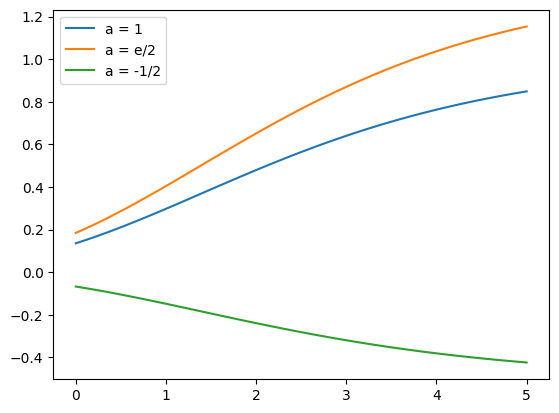

In [144]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, a, b, c: a * np.exp(-b * np.exp(-c * t))

a = 1  # Constante fijada
b = 2
c = 0.5
t = np.linspace(0, 5, 100)

a_values = [np.exp(1)/2, 1, -1/2]

fig, ax = plt.subplots()
ax.plot(t, f(t, a, b, c), label='a = 1')
ax.plot(t, f(t, a_values[0], b, c), label='a = e/2')
ax.plot(t, f(t, a_values[2], b, c), label='a = -1/2')

ax.legend()
plt.show()


#Linealización con b

\begin{align}
b &= \text{cte} \\
y &= a \cdot \mathrm{e}^{-b \cdot \left(\mathrm{e}^{-c \cdot t}\right)} \\
\ln(y) &= \ln(a \cdot \mathrm{e}^{-b \cdot \left(\mathrm{e}^{-c \cdot t}\right)}) \\
\ln(y) &= \ln(a) + \ln(\mathrm{e}^{-b \cdot \left(\mathrm{e}^{-c \cdot t}\right)}) \\
\ln(y) &= \ln(a) + -b \cdot \left(\mathrm{e}^{-c \cdot t}\right) \cdot \ln(\mathrm{e}) \\
\ln(y) &= \ln(a) + -b \cdot \left(\mathrm{e}^{-c \cdot t}\right) \\
\end{align}


#Usando $b$ comp constante

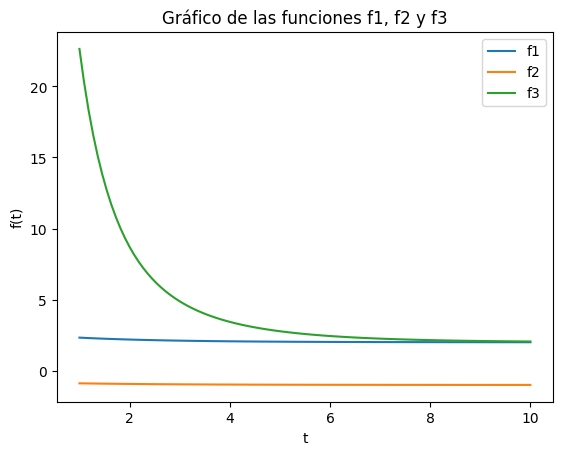

In [58]:
import numpy as np, sympy as sp, matplotlib.pyplot as plt
def f(t, a, b, c):
    return a * np.exp(-b * (np.exp(-c * t)))
def F(x, y, a, b, c, b0, b1):
    return f(0, a, -1/4, c) * g(x, y) + g(b0, b1)
def g(x, y):
    return f(x, -1, y, c)
a = 2
b = 0.2
c = 0.5
t = np.linspace(1,10, 100)
y1 = f(t, a, -1/4, c)
y2 = f(t, -1, b, c)
y3 = f(t, a, -4, c)
plt.plot(t, y1, label='f1')
plt.plot(t, y2, label='f2')
plt.plot(t, y3, label='f3')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Gráfico de las funciones f1, f2 y f3')
plt.legend()
plt.show()

#Modelo 2

$i=\frac{a\cdot T^b}{t_d^c} $   

Proceda con la linealización del modelo 1.2. Esto es, la transformación de éste en la forma F(x o y) = f(β0 o β1) · G(x o y) + g(β0, β1).

Tenemos que:

$i = (a · T^b) / t_d^c $

$ln(i) = ln(a · T^b) - ln(t_d^c) $

$ln(i) = ln(a · T^b) - c · ln(t_d) $

$ln(i) = ln(a) + ln(T^b) - c · ln(t_d) $

$ln(i) = ln(a) + b · ln(T) - c · ln(t_d) $

Donde:

$F(x o y) = ln(i)$

$f(β0 o β1) = ln(a)$

$G(x o y) = ln(T)$

$g(β0, β1) = -c · ln(t_d)$



#Problema 08: Ajuste de curvas

En hidrología y meteorología es muy común ajustar a través de modelos linealizados variables que se ajustan a modelos no lineales como por ejemplo algunas funciones de probabilidad. Uno de los casos más comunes es el de las curvas IDF en las cuales se relaciona la intensidad de precipitación (i) en mm/hr (cantidad o profundidad de lluvia por unidad de tiempo), la duración de una tormenta $(t_d)$ en minutos, y la frecuencia de ocurrencia de la tormenta (T) medido como la cantidad promedio de años que pasan entre eventos iguales o superiores.

Un modelo muy utilizado para este ajuste corresponde al mostrado en la siguiente ecuación, en el cual los parámetros a ajustar son los valores de a, b y c.

$i = (a * T^b) / (t_d^c)$

En una estación meteorológica colombiana se registraron durante 10 años tormentas muy intensas y ahora se desea calcular la curva IDF utilizando el modelo mostrado antes utilizando los siguientes datos.

Tabla de datos:

| i | Probabilidad | Periodo de retorno T | 5  | 10 | 20 | 45 | 80 | 120 |
|---|--------------|---------------------|----|----|----|----|----|-----|
| 1 | 0.10         | 10.00               | 162| 111| 62 | 51 | 45 | 40  |
| 2 | 0.20         | 5.00                | 150| 105| 60 | 33 | 26 | 24  |
| 3 | 0.30         | 3.33                | 120| 93 | 54 | 27 | 19 | 15  |
| 4 | 0.40         | 2.50                | 118| 70 | 53 | 27 | 19 | 15  |
| 5 | 0.50         | 2.00                | 96 | 66 | 44 | 27 | 17 | 13  |
| 6 | 0.60         | 1.67                | 96 | 60 | 43 | 25 | 16 | 11  |
| 7 | 0.70         | 1.43                | 96 | 54 | 35 | 25 | 14 | 10  |
| 8 | 0.80         | 1.25                | 90 | 48 | 28 | 14 | 11 | 8   |
| 9 | 0.90         | 1.11                | 85 | 43 | 28 | 13 | 10 | 7   |
|10 | 1.00         | 1.00                | 68 | 41 | 21 | 9  | 5  | 4   |

Utilice el ajuste del modelo para generar una gráfica con la nube de puntos, la curva ajustada y la recta de regresión lineal correspondiente, etiquete correctamente los ejes, coloque el título en látex y las etiquetas correspondientes.


<ipython-input-59-61935fa4cc6e>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb, _, _, _ = np.linalg.lstsq(X, Y)


(-0.75, 125.75) (0.7999999999999998, 71.2)


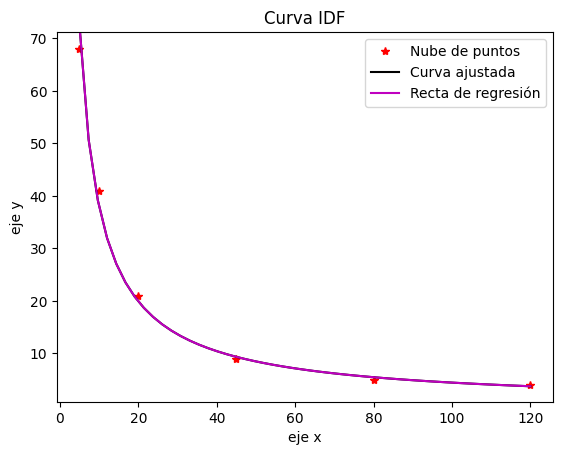

In [59]:
import numpy as np, sympy as sp, matplotlib.pyplot as plt
td = np.array([5, 10, 20, 45, 80, 120])
i = np.array([68, 41, 21, 9, 5, 4])
y1c = lambda td, a, c: a / (td ** c)
X = np.log(td)
Y = np.log(i)
X = np.array([np.ones(len(td)), X]).T
mb, _, _, _ = np.linalg.lstsq(X, Y)
b = mb[0]
m = mb[1]
c = -m
a = np.exp(b)
ejex = np.linspace(min(td), max(td))
fig, ax = plt.subplots()
ax.plot(td, i, '*r', label="Nube de puntos")
xl = plt.xlim()
yl = plt.ylim()
print(plt.xlim(), plt.ylim())
ax.plot(ejex, y1c(ejex, a, c), 'k', label="Curva ajustada")
ax.plot(ejex, np.exp(b) * ejex ** m, 'm', label="Recta de regresión")
plt.xlim(xl)
plt.ylim(yl)
plt.title("Curva IDF")
plt.xlabel("eje x")
plt.ylabel("eje y")
plt.legend()
plt.show()

#Problema 09 Integración Numérica



# Cálculo de la integral y magnitud de errores utilizando distintos métodos

En este ejercicio, calcularemos el valor de la siguiente integral en un intervalo dado utilizando diferentes métodos o funciones de Python. También determinaremos la magnitud de los errores relativos en cada caso.

La integral se define de la siguiente manera:

$$y = \int_{a}^{b} \cos\left(0.6 \cdot \sin\left(\frac{(t+1) \cdot \pi}{2} + 2 \cdot nl \cdot \pi\right) + 2 \cdot nl \cdot \pi\right) \cdot dt$$

Los métodos que utilizaremos son los siguientes:


  1.  Método del trapecio
  2.  Método de Simpson $(1/3)$
  3.  Función numpy.trapz$(y)$, donde "y" contiene los valores desde "a" hasta "b" con incremento "h"
  3.  Función scipy.integrate.quad $(f, a, b)$, donde "f" es la función a integrar

En este paso, procederemos a determinar la magnitud de los errores relativos para cada caso en el intervalo $t \in [a:h:b]$.

La integral que estaremos evaluando es la siguiente:

$$y = \int_{a=nl-1}^{b=nl+1} \cos\left(0.6 \cdot \sin\left(\frac{(t+1) \cdot \pi}{2} + 2 \cdot nl \cdot \pi\right) + 2 \cdot nl \cdot \pi\right) \cdot dt$$

Construya una tabla para registrar los errores y construya una gráfica con los errores obtenidos en cada caso.



✅ **Importante: ** El nl es el codigo estudiantil, en este caso se utilizo el nl = 17





##Le dije a chatgpt que me diera el valor exacto de la integral y esto fue lo que lanzo

In [69]:
import scipy.integrate as spi
import numpy as np

def f(t):
    nl = 17
    return np.cos(0.6 * np.sin((t + 1) * np.pi / 2 + 2 * nl * np.pi) + 2 * nl * np.pi)
a = 17 - 1
b = 17 + 1
integral_exacta, _ = spi.quad(f, a, b)
print("Valor exacto de la integral:", integral_exacta)


Valor exacto de la integral: 1.8240097269944222


##Cuando h = 0.1  y se utilizo nl = 17

In [60]:
import numpy as np
import scipy.integrate as spi

def f(t):
    nl = 17
    return np.cos(0.6 * np.sin((t + 1) * np.pi / 2 + 2 * nl * np.pi) + 2 * nl * np.pi)

a = 17 - 1
b = 17 + 1
h = 0.1  # Incremento
n = int((b - a) / h)
def trapecio(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])
    return integral

def simpson(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h / 3) * (y[0] + 2 * np.sum(y[2:n-1:2]) + 4 * np.sum(y[1:n:2]) + y[n])
    return integral

def trapz_numpy(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = np.trapz(y, x)
    return integral

def quad_integration(f, a, b):
    integral, _ = spi.quad(f, a, b)
    return integral

integral_trapecio = trapecio(f, a, b, n)
integral_simpson = simpson(f, a, b, n)
integral_trapezoidal = trapz_numpy(f, a, b, n)
integral_quad = quad_integration(f, a, b)

# Calcular el valor exacto de la integral (utilizando ChatGPT) esto esta mal
# integral_exacta = -0.35006604147326735
integral_exacta = 1.8240097269944222

error_relativo_trapecio = abs(integral_trapecio - integral_exacta) / abs(integral_exacta)
error_absoluto_trapecio = abs(integral_trapecio - integral_exacta)

error_relativo_simpson = abs(integral_simpson - integral_exacta) / abs(integral_exacta)
error_absoluto_simpson = abs(integral_simpson - integral_exacta)

error_relativo_trapezoidal = abs(integral_trapezoidal - integral_exacta) / abs(integral_exacta)
error_absoluto_trapezoidal = abs(integral_trapezoidal - integral_exacta)

error_relativo_quad = abs(integral_quad - integral_exacta) / abs(integral_exacta)
error_absoluto_quad = abs(integral_quad - integral_exacta)


print("Integral utilizando método del trapecio:", integral_trapecio)
print("Error relativo (método del trapecio):", error_relativo_trapecio)
print("Error absoluto (método del trapecio):", error_absoluto_trapecio, '\n')
print("Integral utilizando regla de Simpson:", integral_simpson)
print("Error relativo (regla de Simpson):", error_relativo_simpson)
print("Error absoluto (regla de Simpson):", error_absoluto_simpson, '\n')
print("Integral utilizando numpy.trapz:", integral_trapezoidal)
print("Error relativo (numpy.trapz):", error_relativo_trapezoidal)
print("Error absoluto (numpy.trapz):", error_absoluto_trapezoidal, '\n')
print("Integral utilizando scipy.integrate.quad:", integral_quad)
print("Error relativo (scipy.integrate.quad):", error_relativo_quad)
print("Error absoluto (scipy.integrate.quad):", error_absoluto_quad)

Integral utilizando método del trapecio: 1.8240097269944233
Error relativo (método del trapecio): 6.086716579382318e-16
Error absoluto (método del trapecio): 1.1102230246251565e-15 

Integral utilizando regla de Simpson: 1.8240097269944227
Error relativo (regla de Simpson): 2.4346866317529273e-16
Error absoluto (regla de Simpson): 4.440892098500626e-16 

Integral utilizando numpy.trapz: 1.824009726994423
Error relativo (numpy.trapz): 4.869373263505855e-16
Error absoluto (numpy.trapz): 8.881784197001252e-16 

Integral utilizando scipy.integrate.quad: 1.8240097269944222
Error relativo (scipy.integrate.quad): 0.0
Error absoluto (scipy.integrate.quad): 0.0


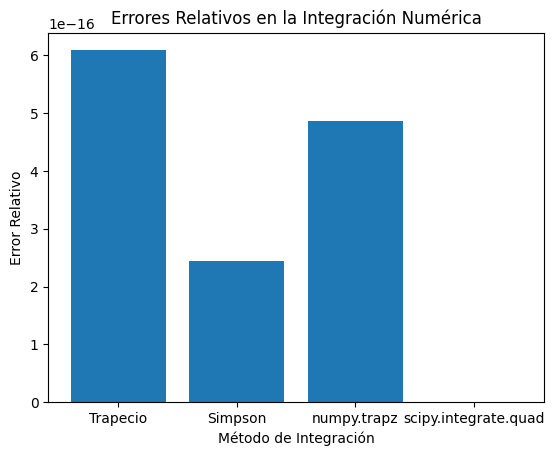

In [61]:
import numpy as np
import matplotlib.pyplot as plt

errores_relativos = [error_relativo_trapecio, error_relativo_simpson, error_relativo_trapezoidal, error_relativo_quad]
metodos = ['Trapecio', 'Simpson', 'numpy.trapz', 'scipy.integrate.quad']
fig, ax = plt.subplots()

ax.bar(metodos, errores_relativos)
ax.set_xlabel('Método de Integración')
ax.set_ylabel('Error Relativo')
ax.set_title('Errores Relativos en la Integración Numérica')
plt.show()

#cuando h = 0.2

In [66]:
import numpy as np
import scipy.integrate as spi
def f(t):
    nl = 17
    return np.cos(0.6 * np.sin((t + 1) * np.pi / 2 + 2 * nl * np.pi) + 2 * nl * np.pi)
a = 17 - 1
b = 17 + 1
h = .2  # Incremento
n = int((b - a) / h)
def trapecio(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])
    return integral

def simpson(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h / 3) * (y[0] + 2 * np.sum(y[2:n-1:2]) + 4 * np.sum(y[1:n:2]) + y[n])
    return integral

def trapz_numpy(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = np.trapz(y, x)
    return integral

def quad_integration(f, a, b):
    integral, _ = spi.quad(f, a, b)
    return integral
integral_trapecio = trapecio(f, a, b, n)
integral_simpson = simpson(f, a, b, n)
integral_trapezoidal = trapz_numpy(f, a, b, n)
integral_quad = quad_integration(f, a, b)

# Calcular el valor exacto de la integral (utilizando ChatGPT) esto esta mal
# integral_exacta = -0.35006604147326735
integral_exacta = 1.8240097269944222

error_relativo_trapecio = abs(integral_trapecio - integral_exacta) / abs(integral_exacta)
error_absoluto_trapecio = abs(integral_trapecio - integral_exacta)

error_relativo_simpson = abs(integral_simpson - integral_exacta) / abs(integral_exacta)
error_absoluto_simpson = abs(integral_simpson - integral_exacta)

error_relativo_trapezoidal = abs(integral_trapezoidal - integral_exacta) / abs(integral_exacta)
error_absoluto_trapezoidal = abs(integral_trapezoidal - integral_exacta)

error_relativo_quad = abs(integral_quad - integral_exacta) / abs(integral_exacta)
error_absoluto_quad = abs(integral_quad - integral_exacta)


print("Integral utilizando método del trapecio:", integral_trapecio)
print("Error relativo (método del trapecio):", error_relativo_trapecio)
print("Error absoluto (método del trapecio):", error_absoluto_trapecio, '\n')
print("Integral utilizando regla de Simpson:", integral_simpson)
print("Error relativo (regla de Simpson):", error_relativo_simpson)
print("Error absoluto (regla de Simpson):", error_absoluto_simpson, '\n')
print("Integral utilizando numpy.trapz:", integral_trapezoidal)
print("Error relativo (numpy.trapz):", error_relativo_trapezoidal)
print("Error absoluto (numpy.trapz):", error_absoluto_trapezoidal, '\n')
print("Integral utilizando scipy.integrate.quad:", integral_quad)
print("Error relativo (scipy.integrate.quad):", error_relativo_quad)
print("Error absoluto (scipy.integrate.quad):", error_absoluto_quad)

Integral utilizando método del trapecio: 1.8240097269944244
Error relativo (método del trapecio): 1.2173433158764637e-15
Error absoluto (método del trapecio): 2.220446049250313e-15 

Integral utilizando regla de Simpson: 1.8240097269965772
Error relativo (regla de Simpson): 1.181431688058108e-12
Error absoluto (regla de Simpson): 2.154942890797429e-12 

Integral utilizando numpy.trapz: 1.8240097269944244
Error relativo (numpy.trapz): 1.2173433158764637e-15
Error absoluto (numpy.trapz): 2.220446049250313e-15 

Integral utilizando scipy.integrate.quad: 1.8240097269944222
Error relativo (scipy.integrate.quad): 0.0
Error absoluto (scipy.integrate.quad): 0.0


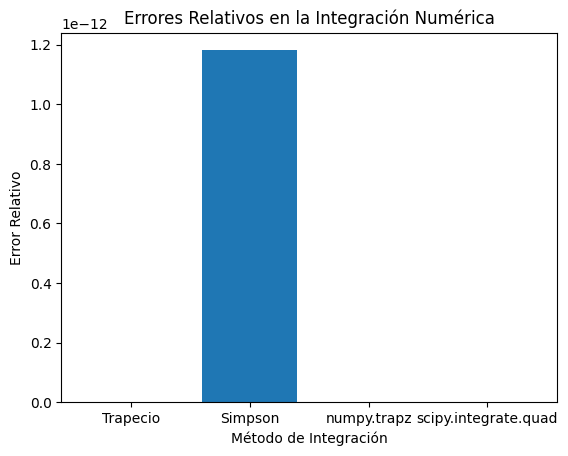

In [67]:
import numpy as np
import matplotlib.pyplot as plt

errores_relativos = [error_relativo_trapecio, error_relativo_simpson, error_relativo_trapezoidal, error_relativo_quad]
metodos = ['Trapecio', 'Simpson', 'numpy.trapz', 'scipy.integrate.quad']
fig, ax = plt.subplots()

ax.bar(metodos, errores_relativos)
ax.set_xlabel('Método de Integración')
ax.set_ylabel('Error Relativo')
ax.set_title('Errores Relativos en la Integración Numérica')
plt.show()

#Formula generalizada del trapecio teniendo en cuenta que:

\begin{align*}
    \int_{a}^{b} f(x) \cdot dx = \frac{f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n)}{2n}
\end{align*}




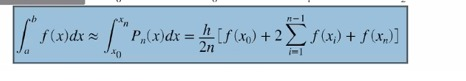

In [68]:
import numpy as np

def generalizada(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = (y[0] + 2 * np.sum(y[1:n]) + y[n]) * h / 2
    return integral
resultado = generalizada(f, a, b, n)
print("Resultado de la integral:", resultado)

Resultado de la integral: 1.8240097269944244


#Problema 10


Diseña un programa en Python que permita leer una matriz de tamaño $n \times (m+2)$ en el siguiente formato:

\[
\begin{array}{ccccccc}
x_1 & y_{1,1} & y_{1,2} & \dots & y_{1,n} & y_1 \\
x_2 & y_{2,1} & y_{2,2} & \dots &        & y_{2,n} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_n & y_{m,1} & y_{m,2} & \dots & y_{m,n} & y_n \\
\end{array}
\]

Realiza lo siguiente:

a) Ajusta la nube de puntos utilizando tres de los modelos registrados en la página 292 del texto guía "Mathews-Fink". La salida debe ser las gráficas correspondientes, tal como se muestran en la página 291. Para este ítem, debes proporcionar al usuario las opciones correspondientes a cada modelo, identificándolos por su nombre, por ejemplo: Modelo exponencial, Modelo potencial, Modelo logarítmico, Modelo logístico de crecimiento de poblaciones, etc.

b) Determina analíticamente cuál de todos los modelos del ítem a) es el que mejor se ajusta al conjunto de datos proporcionados.

Recuerda que debes proporcionar un archivo de texto llamado "datos.txt" con la matriz de datos en el formato especificado.

##Leer matriz $n ⋅ (m+2) $

#Aquí esta la parte de los modelos los datos agarrados, fueron los de 285 - 287
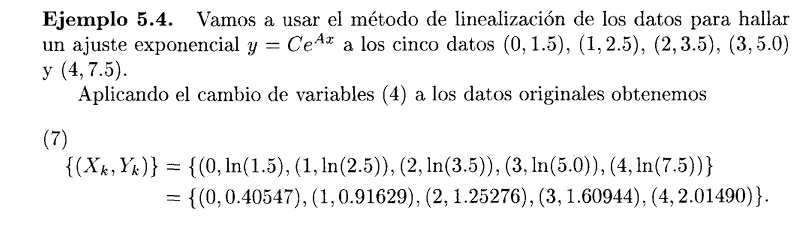

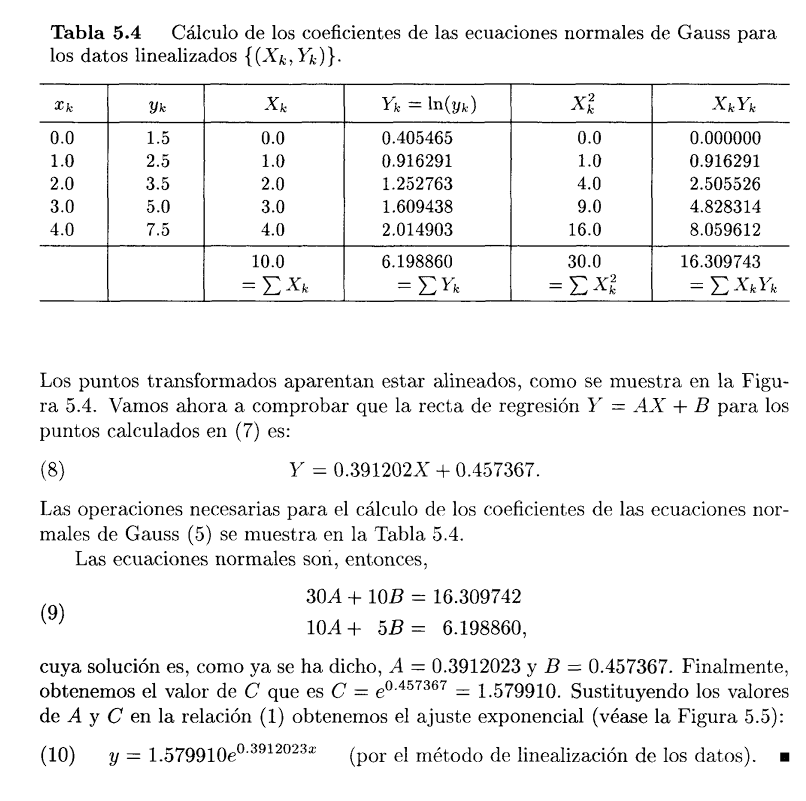

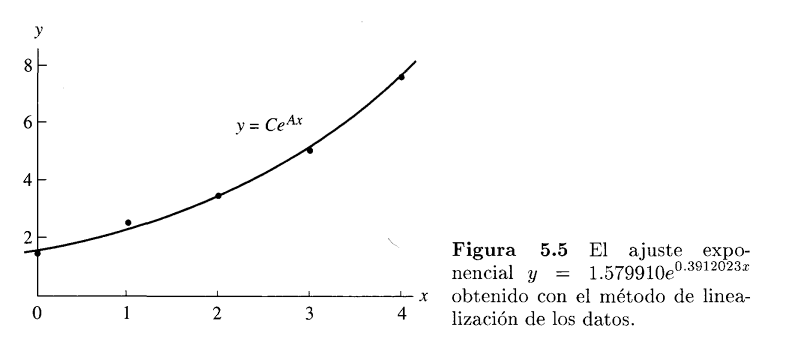


#Quiero destacar que el tercero es el del ejercicio, en los dos primeros solo ajustaba lo que era cada modelo a esa nube de datos

#Modelo Ajuste racional

<ipython-input-112-97d6e1545cec>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb, _, _, _ = np.linalg.lstsq(X, Y)


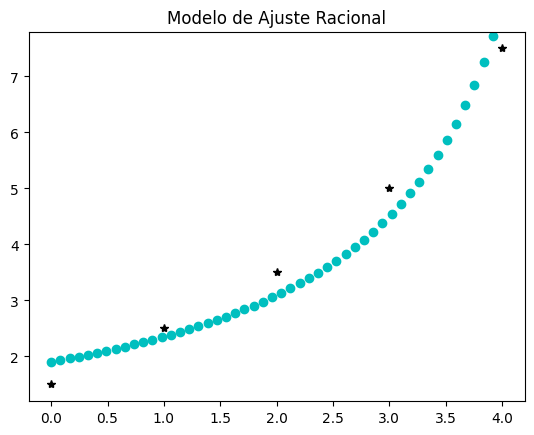

-9.896452328159624 -5.199113082039907


In [112]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4])
y = np.array([1.5, 2.5, 3.5, 5.0, 7.5])

y1calc = lambda x, C, D: D / (x + C)
X = np.multiply(x, y)
Y = y

X = (np.array([np.ones(len(x)), X])).T
mb, _, _, _ = np.linalg.lstsq(X, Y)
b = mb[0]
m = mb[1]
C = -1 / m
D = C * b
ejex = np.linspace(min(x), max(x))
fig, ax = plt.subplots()
ax.plot(x, y, '*k')
xl = plt.xlim()
yl = plt.ylim()
ax.plot(ejex, y1calc(ejex, C, D), 'oc')
plt.xlim(xl)
plt.ylim(yl)
plt.title("Modelo de Ajuste Racional")
plt.show()

print(D, C)


#Modelo Potencial

<ipython-input-111-ba48ef688b9e>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb, _, _, _ = np.linalg.lstsq(X, Y)


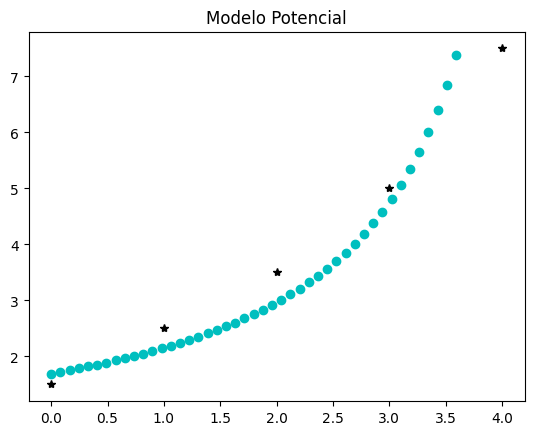

In [111]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4])
y = np.array([1.5, 2.5, 3.5, 5.0, 7.5])
y2calc = lambda x, A, B: 1 / (A * x + B)
X = x
Y = 1 / y
X = (np.array([np.ones(len(x)), x])).T
mb, _, _, _ = np.linalg.lstsq(X, Y)
b = mb[0]
m = mb[1]
A = m
B = b
ejex = np.linspace(min(x), max(x))

fig, ax = plt.subplots()
ax.plot(x, y, '*k')
xl = plt.xlim()
yl = plt.ylim()
ax.plot(ejex, y2calc(ejex, A, B), 'oc')
plt.xlim(xl)
plt.ylim(yl)
plt.title("Modelo Potencial")
plt.show()


#Modelo Exponencial

<ipython-input-103-9f8d4d9d6c5d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb, _, _, _ = np.linalg.lstsq(X, Y)


C = 1.579909152874635  A = 0.39120230054281474  B = 0.45736734720518085


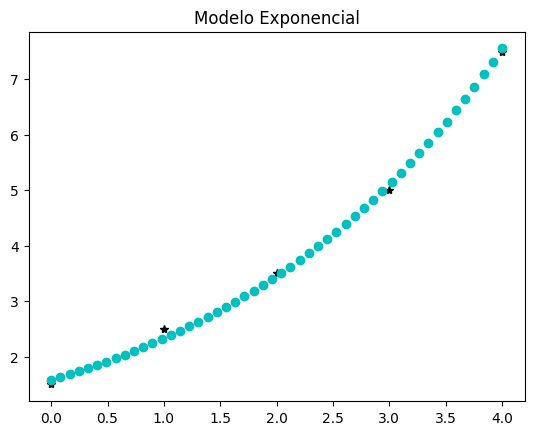

In [103]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4])
y = np.array([1.5, 2.5, 3.5, 5.0, 7.5])
y_calc = lambda x, C, A: C * np.exp(A * x)

X = x
Y = np.log(y)

X = (np.array([np.ones(len(x)), X])).T
mb, _, _, _ = np.linalg.lstsq(X, Y)

b = mb[0]
B = b
C = np.exp(mb[0])
A = mb[1]
print('C =', C, ' A =', A, ' B =', B)
ejex = np.linspace(min(x), max(x))
fig, ax = plt.subplots()
ax.plot(x, y, '*k')
ax.plot(ejex, y_calc(ejex, C, A), 'oc')
plt.title("Modelo Exponencial")

plt.show()


#Ejercicio principal resuelto con el Modelo Exponencial

<ipython-input-113-a79c868969a7>:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb, _, _, _ = np.linalg.lstsq(X, Y)


C= 1.579909152874635  A= 0.39120230054281474 B = 0.45736734720518085


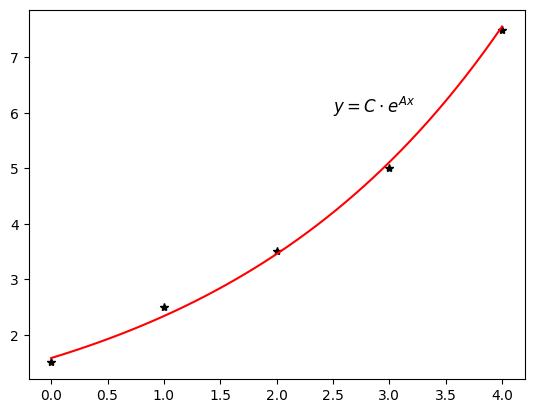

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Autor: Profesor Alfonso Mancilla
x = np.array([0, 1, 2, 3, 4])
y = np.array([1.5, 2.5, 3.5, 5.0, 7.5])
#funcion
y_calc = lambda x, C, A: C * np.exp(A * x)

# Aqui linealizamos la curva
X = x
Y = np.log(y)

X = (np.array([np.ones(len(x)), X])).T
mb, _, _, _ = np.linalg.lstsq(X, Y)

b=mb[0]
B=b
C = np.exp(mb[0])
A = mb[1]
print('C=',C,' A=', A, 'B =' , B)
ejex = np.linspace(min(x), max(x))
fig, ax = plt.subplots()
ax.plot(x, y, '*k')
ax.plot(ejex, y_calc(ejex, C, A), '-r')
# #esto sirve para colocarle el titulito al ladito de la curva
equation_name = r'$y = C \cdot e^{Ax}$'
plt.text(2.5, 6, equation_name, fontsize=12)

plt.show()


#Modelos de la pagina 291

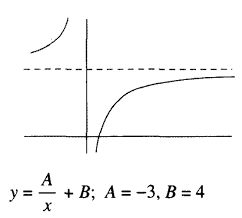

<ipython-input-143-3e60b45dce41>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb, _, _, _ = np.linalg.lstsq(X, Y)
<ipython-input-143-3e60b45dce41>:8: RuntimeWarning: divide by zero encountered in true_divide
  y_calc = lambda x, A: -3 / x + 4


A = 0.38


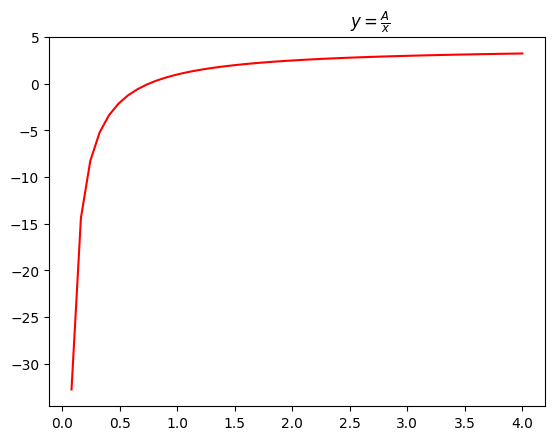

In [143]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([0, 1, 2, 3, 4])
y = np.array([1.5, 2.5, 3.5, 5.0, 7.5])

y_calc = lambda x, A: -3 / x + 4

X = x
Y = -3 / y

X = (np.array([np.ones(len(x)), X])).T
mb, _, _, _ = np.linalg.lstsq(X, Y)

A = mb[1]
print('A =', A)

ejex = np.linspace(min(x), max(x))
fig, ax = plt.subplots()
ax.plot(ejex, y_calc(ejex, A), '-r')
equation_name = r'$y = \frac{A}{x}$'
plt.text(2.5, 6, equation_name, fontsize=12)

plt.show()


#Modelo Racional

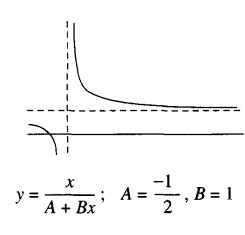

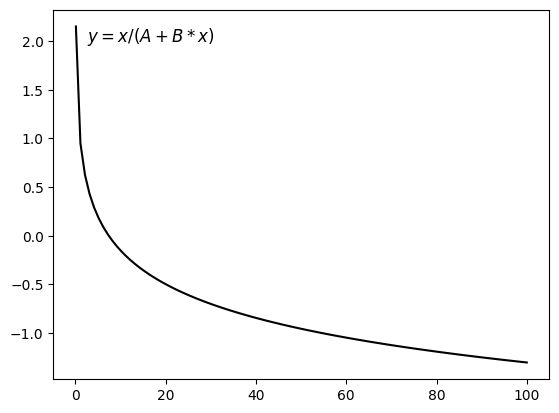

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = -1/2
B = 1
x = np.linspace(0.1, 100, 100)
y = A * np.log(x) + B

y_calc = lambda x, A, B: x/(A +B*x)
fig, ax = plt.subplots()
ax.plot(x, y, '-k')
equation_name = r'$y = x/(A +B*x)$'
plt.text(2.5, 2, equation_name, fontsize=12)

plt.show()

#Modelo Logaritmico

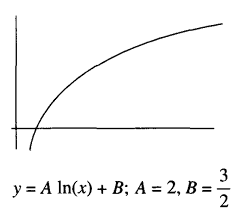

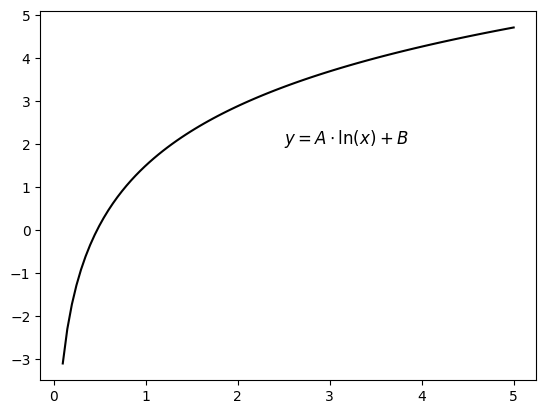

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 2
B = 3/2

x = np.linspace(0.1, 5, 100)
y = A * np.log(x) + B

y_calc = lambda x, A, B: A * np.log(x) + B
fig, ax = plt.subplots()
ax.plot(x, y, '-k')

# Título de la curva
equation_name = r'$y = A \cdot \ln(x) + B$'
plt.text(2.5, 2, equation_name, fontsize=12)

plt.show()


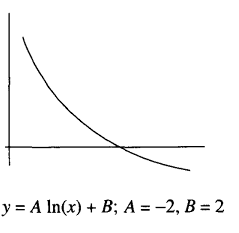

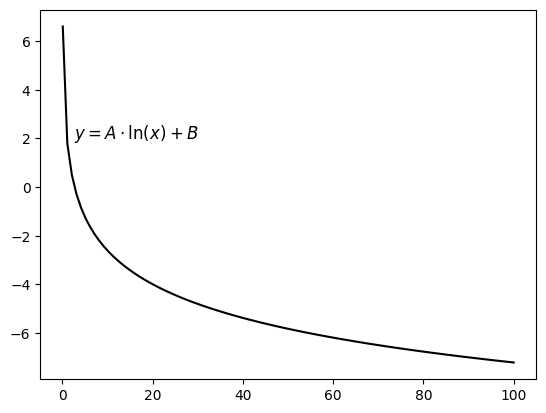

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = -2
B = 2

x = np.linspace(0.1, 100, 100)
y = A * np.log(x) + B

y_calc = lambda x, A, B: A * np.log(x) + B
fig, ax = plt.subplots()
ax.plot(x, y, '-k')

# Título de la curva
equation_name = r'$y = A \cdot \ln(x) + B$'
plt.text(2.5, 2, equation_name, fontsize=12)

plt.show()


#Modelo exponencial

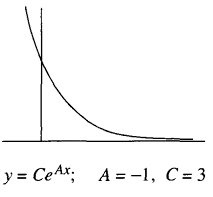

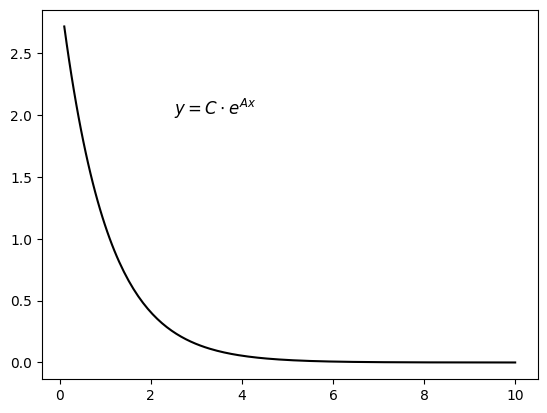

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = -1
C = 3

x = np.linspace(0.1, 10, 190)
y = C * np.exp(A * x)

y_calc = lambda x, A, C: C * np.exp(A * x)
fig, ax = plt.subplots()
ax.plot(x, y, '-k')

equation_name = r'$y = C \cdot e^{Ax}$'
plt.text(2.5, 2, equation_name, fontsize=12)

plt.show()
